In [168]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import scipy.io
import codecs
import cv2
import matplotlib.pyplot as plt

In [169]:
def show_scatter(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(np.array(matrix[0, :]), np.array(matrix[1, :]))
    plt.show()

In [170]:
# 读入特征匹配点

In [171]:
dat1 = pd.read_table('res10.txt',header=None,delim_whitespace=True)
dat2 = pd.read_table('res20.txt',header=None,delim_whitespace=True)

In [181]:
dat1 = np.array(dat1)
dat2 = np.array(dat2)
print(dat1[0:5])
print(dat2[0:5])

[[542.73915559  90.54713863]
 [534.80168966 116.12207108]
 [527.16761295 140.7973051 ]
 [519.50200055 165.36802263]
 [511.83343561 189.21498932]]
[[367.4120788   29.27329957]
 [362.91662914  57.27078662]
 [358.84640753  84.24314081]
 [354.70661583 110.43581164]
 [350.64063452 135.72394077]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BF062D208>,
      dtype=object)

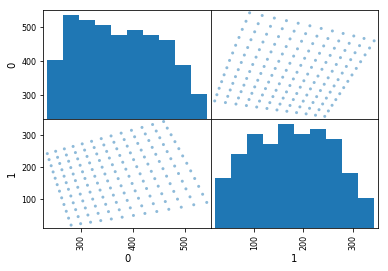

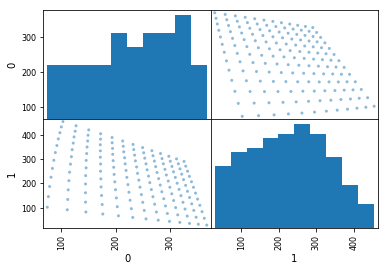

In [180]:
# show_scatter(dat1)
# show_scatter(dat2)
x1  =pd.DataFrame(dat1)
x2  =pd.DataFrame(dat2)
pd.plotting.scatter_matrix(x1)
pd.plotting.scatter_matrix(x2)

In [118]:
# 求解相机内参矩阵（已知）

In [119]:
K_1 = np.array([[533.52331,0,341.60376],[0,533.52699,235.19287],[0,0,1]])
K_2 = np.array([[536.81377,0,326.28657],[0,536.47649,250.10121],[0,0,1]])
print(K_1)
print(K_2)

[[533.52331   0.      341.60376]
 [  0.      533.52699 235.19287]
 [  0.        0.        1.     ]]
[[536.81377   0.      326.28657]
 [  0.      536.47649 250.10121]
 [  0.        0.        1.     ]]


In [120]:
cameraMatrix = K_1

In [121]:
# 求解本质矩阵

In [122]:
E,mask = cv2.findEssentialMat(dat1,dat2,cameraMatrix)

In [123]:
E

array([[-0.00549119, -0.48814676, -0.35613007],
       [ 0.50280658,  0.16702577,  0.19994647],
       [ 0.48921962, -0.25176445, -0.10696788]])

In [124]:
# 求解相机外参矩阵

In [125]:
R1,R2,t = cv2.decomposeEssentialMat(E)

In [126]:
print(R1.shape)
print(t.shape)
waican1 = np.hstack((R1,t))
waican2 = np.hstack((R2,t))
print(waican1.shape)
print(waican1)

(3, 3)
(3, 1)
(3, 4)
[[ 0.91277306  0.23399036 -0.3348042  -0.51933412]
 [-0.27968294  0.95540286 -0.09477776 -0.5988478 ]
 [ 0.29769581  0.18014961  0.9375091   0.60965022]]


In [127]:
# 求解相机矩阵

In [128]:
KK1 = np.dot(cameraMatrix,waican1)
KK2  =np.dot(cameraMatrix,waican2)

In [129]:
# 计算特征匹配点的三维重构坐标

In [190]:
# 将特征匹配点矩阵转置为triangulate函数所需的数据格式
dat1 = dat1.T
dat2 = dat2.T
print(dat1.shape)
print(dat2.shape)

(2, 156)
(2, 156)


In [192]:
print(dat1[:,0:5])
print(dat2[:,0:5])

[[542.73915559 534.80168966 527.16761295 519.50200055 511.83343561]
 [ 90.54713863 116.12207108 140.7973051  165.36802263 189.21498932]]
[[367.4120788  362.91662914 358.84640753 354.70661583 350.64063452]
 [ 29.27329957  57.27078662  84.24314081 110.43581164 135.72394077]]


In [193]:
x1 = cv2.triangulatePoints(KK1,KK2,dat1,dat2)

In [194]:
x1

array([[ 0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0884282 ,
         0.0884282 ,  0.0884282 ,  0.0884282 ,  0.0